In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from numpy import random

from plotnine import *
%matplotlib inline

In [ ]:
df = pd.read_csv('rdd_rarotonga.csv')
df= df.rename(columns={'yield': 'fruit_yield'})

df.head()

,fruit_yield,score
0,143.458137,765.963832
1,210.550664,767.953965
2,141.786601,764.862454
3,192.392737,765.292672
4,182.075053,764.681314


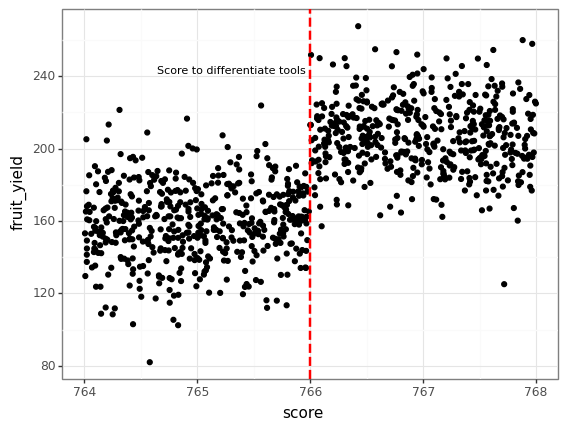

<ggplot: (8729964829582)>

In [ ]:
(ggplot(data=df, mapping=aes(x='score', y='fruit_yield'))+
       geom_point()+ labs(y = "fruit_yield",
       x = "score")+
 geom_vline(xintercept = 766, color = "red", size = 1, linetype = "dashed")+
 annotate("text", x = 765.3, y = 243, label = "Score to differentiate tools",
           size=8)+
 theme_bw()
       )

In [ ]:
#adding threshold to indicate whether the score is above 766
df['threshold']=np.where(df['score']>=766, 1, 0)

# For the sake of making things more readable we will also create a centered variable
df['centered']=df['score']-766
df.head()

,fruit_yield,score,threshold,centered
0,143.458137,765.963832,0,-0.036168
1,210.550664,767.953965,1,1.953965
2,141.786601,764.862454,0,-1.137546
3,192.392737,765.292672,0,-0.707328
4,182.075053,764.681314,0,-1.318686


In [ ]:
reg1 = smf.ols('fruit_yield ~ threshold+centered',df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fruit_yield   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     722.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.05e-194
Time:                        01:44:54   Log-Likelihood:                -4406.8
No. Observations:                1000   AIC:                             8820.
Df Residuals:                     997   BIC:                             8834.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.8756      1.418    112.717      0.000     157.092     162.659
threshold     46.6202      2.533     18.404      0.000      41.649      51.591
centered       0.5838      1.090      0.536      0.592      -1.555       2.722
==============================================================================
Omnibus:                        7.563   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                9.766
Skew:                          -0.071   Prob(JB):                      0.00758
Kurtosis:                       3.463   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tool type: threshold+centered

Model used: OLS

The coefficients are positive on threshold and centered.

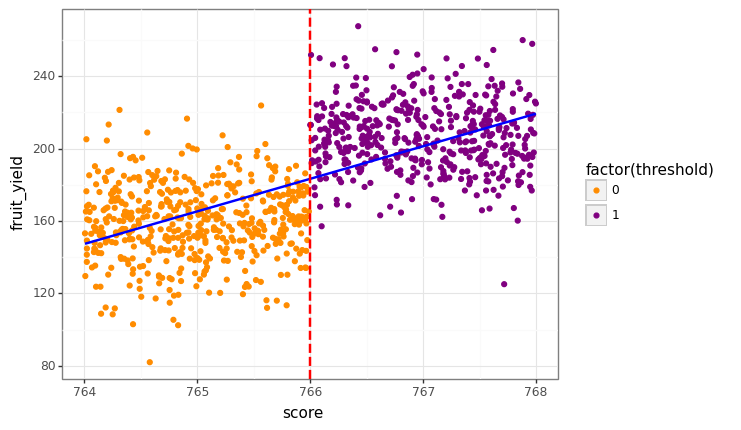

<ggplot: (8729960459990)>

In [ ]:
(ggplot(data=df, mapping=aes(x='score', y='fruit_yield'))+
       geom_point(aes(color='factor(threshold)'))+
 scale_color_manual(values=['darkorange', 'purple'])+
 geom_smooth(method='lm', se=False, color='blue')+
 geom_vline(xintercept = 766, color = "red", size = 1, linetype = "dashed")+
 labs(y = "fruit_yield",
       x = "score")+
 theme_bw()
)

This does not tell if yield for score higher than 766 is positively correlated or not with the golden tips. 

In [ ]:
#adding interaction terms
df['cross']=df['threshold']*df['centered']

In [ ]:
reg2 = smf.ols('fruit_yield ~ threshold+centered+cross',df).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fruit_yield   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     483.9
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          6.78e-194
Time:                        01:44:54   Log-Likelihood:                -4405.2
No. Observations:                1000   AIC:                             8818.
Df Residuals:                     996   BIC:                             8838.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    161.7757      1.780     90.902      0.000     158.283     165.268
threshold     46.6962      2.531     18.451      0.000      41.730      51.662
centered       2.4406      1.514      1.612      0.107      -0.530       5.412
cross         -3.8434      2.178     -1.764      0.078      -8.118       0.431
==============================================================================
Omnibus:                        7.060   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                9.174
Skew:                          -0.054   Prob(JB):                       0.0102
Kurtosis:                       3.457   Cond. No.                         7.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are positive on threshold and centered, but negative on cross

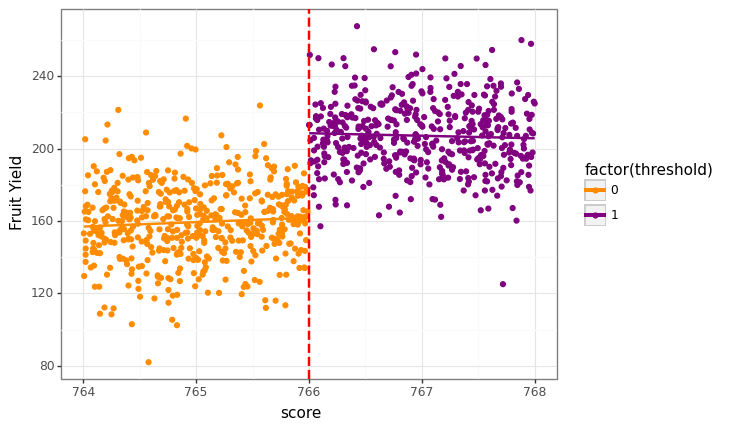

<ggplot: (8729960400400)>

In [ ]:
(ggplot(data=df, mapping=aes(x='score', y='fruit_yield', 
                                 color='factor(threshold)'))+
       geom_point()+
 scale_color_manual(values=['darkorange', 'purple'])+
 geom_smooth(method='lm', se=False)+
 geom_vline(xintercept = 766, color = "red", size = 1, linetype = "dashed")+
 labs(y = "Fruit Yield",
       x = "score")+
 theme_bw()
)

From this graph with interaction term, we can see a slight decrease trend for scores above 766

In [ ]:
#Squared term to make the regression quadratic
df['csq']=df['centered']**2
#Squared cross term
df['crosssq']=df['csq']*df['threshold']

df.head()

,fruit_yield,score,threshold,centered,cross,csq,crosssq
0,143.458137,765.963832,0,-0.036168,-0.000000,0.001308,0.000000
1,210.550664,767.953965,1,1.953965,1.953965,3.817979,3.817979
2,141.786601,764.862454,0,-1.137546,-0.000000,1.294012,0.000000
3,192.392737,765.292672,0,-0.707328,-0.000000,0.500313,0.000000
4,182.075053,764.681314,0,-1.318686,-0.000000,1.738932,0.000000


In [ ]:
reg3 = smf.ols('fruit_yield ~ threshold+centered+cross+csq+crosssq',df).fit()

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fruit_yield   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     290.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.07e-191
Time:                        01:44:55   Log-Likelihood:                -4404.1
No. Observations:                1000   AIC:                             8820.
Df Residuals:                     994   BIC:                             8850.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    163.5071      2.628     62.213      0.000     158.350     168.665
threshold     42.5321      3.769     11.283      0.000      35.135      49.929
centered       7.6651      6.029      1.271      0.204      -4.167      19.497
cross         -1.6682      8.742     -0.191      0.849     -18.822      15.486
csq            2.6163      2.923      0.895      0.371      -3.119       8.352
crosssq       -6.3494      4.256     -1.492      0.136     -14.701       2.002
==============================================================================
Omnibus:                        6.947   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                9.087
Skew:                          -0.045   Prob(JB):                       0.0106
Kurtosis:                       3.458   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients on threshold and centerd and csq are positive. Cross and crosssq have negative coefficients

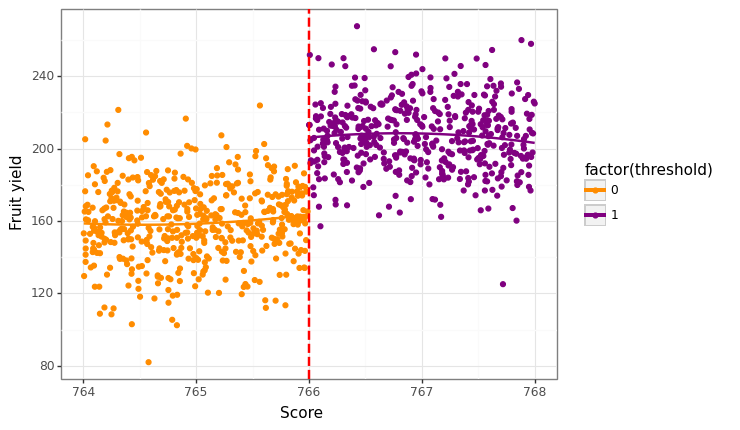

<ggplot: (8729960331394)>

In [ ]:
(ggplot(data=df, mapping=aes(x='score', y='fruit_yield', 
                                 color='factor(threshold)'))+
       geom_point()+
 scale_color_manual(values=['darkorange', 'purple'])+
 geom_smooth(method='lm',
             formula = 'y ~ x+I(x**2)',se=False)+
 geom_vline(xintercept = 766, color = "red", size = 1, linetype = "dashed")+
 labs(y = "Fruit yield",
       x = "Score")+
 theme_bw()
)

By adding square terms and cross interaction terms, we can see a line slightly concaving down. 